In [306]:
import quandl
import sys
from configparser import RawConfigParser

config = RawConfigParser()
file = 'https://raw.githubusercontent.com/rpurcell1010/Capstone2v2/master/config.txt?token=Af6TwDJEOASnRrGMg6zpwvL5ny_svbKlks5bMbjCwA%3D%3D'
#config.read_file(open(file))

In [307]:
file = 'https://raw.githubusercontent.com/rpurcell1010/Capstone2v2/master/config.csv?token=Af6TwMt8hNEMuCr7h0mpArAS-qRmr-Fpks5bMbhFwA%3D%3D'
df = pd.read_csv(file,encoding = "ISO-8859-1", low_memory = False)
df = pd.read_csv(file,index_col=0,parse_dates=[0])
#df['key'].to_string()[11:31]

In [308]:
import quandl
quandl.ApiConfig.api_key = df['key'].to_string()[11:31]

In [309]:
REVGROWTH = quandl.get_table('SHARADAR/SF1',calendardate={'lte':'2013-1-28'} ,qopts={'columns':['ticker' ,'dimension','datekey','REVENUE']})

REVGROWTH['revgrowth']=REVGROWTH.groupby('ticker')['revenue'].pct_change()
REVGROWTH = REVGROWTH.dropna()

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/quandl/get_table.py:38: UserWarning: To request more pages, please set paginate=true in your         quandl.get_table() call. For more information see our documentation:         https://github.com/quandl/quandl-python/blob/master/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


In [310]:
#ADDING CURRENT PRICE TO TABLE

table = quandl.get_table('SHARADAR/SF1',calendardate={'lte':'2012-1-28'} ,qopts={'columns':['ticker' ,'dimension','datekey','EVEBITDA','PE1','PS1','PB','ROE','MARKETCAP','PRICE','DEBT','EBITDA','FCF','CASHNEQ','EV','REVENUE']})

#create a table 2 with current price concat on ticker

table2 = quandl.get_table('SHARADAR/SF1',qopts={'columns':['ticker','dimension','datekey','price'],'latest':1})

#concat with table with table2 on ticker

tablef = table.merge(table2, left_on='ticker', right_on='ticker', how='inner')
tablef['performance'] = tablef['price_y']/tablef['price_x']

In [311]:
import pandas as pd

#CREATE VALUE METRICS

tablef = pd.DataFrame(tablef)

tablef['evrevenue'] = tablef['ev']/tablef['revenue']
tablef['evfcf'] = tablef['ev']/tablef['fcf']

In [312]:
tablef = tablef[['ticker','evrevenue','evfcf','pb','pe1','ps1','evebitda','performance','datekey_y','price_x']].dropna()

# TablePositive only positive ratios. Ratios as of EOY 2011

In [313]:
#only positive ratios
tablepos=tablef[tablef.iloc[:,0:7]>0].iloc[:,0:7].dropna()

#merger performance
tablepositive = tablepos.merge(tablef[['ticker','performance','datekey_y','price_x']], left_on='ticker', right_on='ticker', how='inner')

In [314]:
len(tablepositive)

2595

In [315]:
#BRING IN CURRENT STOCK PRICE

import pandas as pd
import numpy as np
#file = '/Users/ryanpurcell/Desktop/PRICE.csv'
file = 'https://raw.githubusercontent.com/rpurcell1010/Capstone2/master/PRICE.csv'
df = pd.read_csv(file,encoding = "ISO-8859-1", low_memory = False)
#df = pd.read_csv(file,index_col=0,parse_dates=[0])

In [316]:
tablepositive = tablepositive.merge(df, left_on='ticker', right_on='Ticker', how='inner')

In [317]:
tablepositive
tablepositive['performance'] = tablepositive['Price']/tablepositive['price_x']
len(tablepositive)

2579

In [318]:
#remove outlier performance
tablepositive = tablepositive.dropna()
tablepositive = tablepositive[tablepositive['performance']<2000]

In [319]:
#add Revenue Growth to TablePositive
tablepositive =  tablepositive.merge(REVGROWTH, left_on='ticker', right_on='ticker', how='inner')

In [320]:
#indicating slight correlations as expected
tablepositive.corr().iloc[6:7,:]

,evrevenue,evfcf,pb,pe1,ps1,evebitda,performance,price_x,Price,revenue,revgrowth
performance,-0.041343,-0.007519,-0.012636,-0.02997,-0.036042,0.003068,1.0,-0.028229,0.229144,-0.024208,0.023608


Creating Quartiles and comparing quartile performance by group

# By Quartile

In [321]:
#Table Positive by Quartile

#Top 25% for each valuation group
import numpy as np

FILTER4evfcf = tablepositive['evfcf'] > np.percentile(tablepositive['evfcf'], 75)
FILTER4evrev = tablepositive['evrevenue'] > np.percentile(tablepositive['evrevenue'], 75)
FILTER4pb = tablepositive['pb'] > np.percentile(tablepositive['pb'], 75)
FILTER4pe1 = tablepositive['pe1'] > np.percentile(tablepositive['pe1'], 75)
FILTER4ps1 = tablepositive['ps1'] > np.percentile(tablepositive['ps1'], 75)
FILTER4evebitda = tablepositive['evebitda'] > np.percentile(tablepositive['evebitda'], 75)
FILTER4revg = tablepositive['revgrowth'] > np.percentile(tablepositive['revgrowth'], 75)

#25% to 50% for each valuation grouping

FILTER2evfcf = (tablepositive['evfcf'] > np.percentile(tablepositive['evfcf'], 25)) & (tablepositive['evfcf'] <= np.percentile(tablepositive['evfcf'], 50))
FILTER2evrev = (tablepositive['evrevenue'] > np.percentile(tablepositive['evrevenue'], 25)) & (tablepositive['evrevenue'] <= np.percentile(tablepositive['evrevenue'], 50))
FILTER2pb = (tablepositive['pb'] > np.percentile(tablepositive['pb'], 25)) & (tablepositive['pb'] <= np.percentile(tablepositive['pb'], 50))
FILTER2pe1 = (tablepositive['pe1'] > np.percentile(tablepositive['pe1'], 25)) & (tablepositive['pe1'] <= np.percentile(tablepositive['pe1'], 50))
FILTER2ps1 = (tablepositive['ps1'] > np.percentile(tablepositive['ps1'], 25)) & (tablepositive['ps1'] <= np.percentile(tablepositive['ps1'], 50))
FILTER2evebitda = (tablepositive['evebitda'] > np.percentile(tablepositive['evebitda'], 25)) & (tablepositive['evebitda'] <= np.percentile(tablepositive['evebitda'], 50))
FILTER2revg = (tablepositive['revgrowth'] > np.percentile(tablepositive['revgrowth'], 25)) & (tablepositive['revgrowth'] <= np.percentile(tablepositive['revgrowth'], 50))

#50% to 75% for each valuation grouping

FILTER3evfcf = (tablepositive['evfcf'] > np.percentile(tablepositive['evfcf'], 50)) & (tablepositive['evfcf'] <= np.percentile(tablepositive['evfcf'], 75))
FILTER3evrev = (tablepositive['evrevenue'] > np.percentile(tablepositive['evrevenue'], 50)) & (tablepositive['evrevenue'] <= np.percentile(tablepositive['evrevenue'], 75))
FILTER3pb = (tablepositive['pb'] > np.percentile(tablepositive['pb'], 50)) & (tablepositive['pb'] <= np.percentile(tablepositive['pb'], 75))
FILTER3pe1 = (tablepositive['pe1'] > np.percentile(tablepositive['pe1'], 50)) & (tablepositive['pe1'] <= np.percentile(tablepositive['pe1'], 75))
FILTER3ps1 = (tablepositive['ps1'] > np.percentile(tablepositive['ps1'], 50)) & (tablepositive['ps1'] <= np.percentile(tablepositive['ps1'], 75))
FILTER3evebitda = (tablepositive['evebitda'] > np.percentile(tablepositive['evebitda'], 50)) & (tablepositive['evebitda'] <= np.percentile(tablepositive['evebitda'], 75))
FILTER3revg = (tablepositive['revgrowth'] > np.percentile(tablepositive['revgrowth'], 50)) & (tablepositive['revgrowth'] <= np.percentile(tablepositive['revgrowth'], 75))

#lowest 25% for each valuation grouping

FILTERevfcf = tablepositive['evfcf'] <= np.percentile(tablepositive['evfcf'], 25)
FILTERevrev = tablepositive['evrevenue'] <= np.percentile(tablepositive['evrevenue'], 25)
FILTERpb = tablepositive['pb'] <= np.percentile(tablepositive['pb'], 25)
FILTERpe1 = tablepositive['pe1'] <= np.percentile(tablepositive['pe1'], 25)
FILTERps1 = tablepositive['ps1'] <= np.percentile(tablepositive['ps1'], 25)
FILTERevebitda = tablepositive['evebitda'] <= np.percentile(tablepositive['evebitda'], 25)
FILTERrevg = tablepositive['revgrowth'] <= np.percentile(tablepositive['revgrowth'], 25)
FILTERrevgfcf = tablepositive['revgrowth'] <= np.percentile(tablepositive['revgrowth'], 25)

# Growth and EV/FCF

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


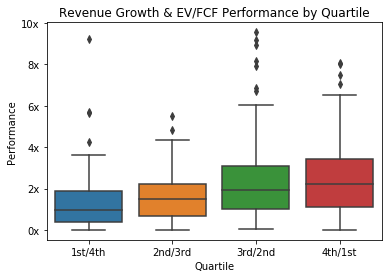

In [322]:
Dict1 = {'25': tablepositive[FILTERrevg][FILTER4evfcf].performance, '50' : tablepositive[FILTER2revg][FILTER3evfcf].performance, '75' : tablepositive[FILTER3revg][FILTER2evfcf].performance, '100' :tablepositive[FILTER4revg][FILTERevfcf].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

filter1 = df['Performance'] < 10

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("Revenue Growth & EV/FCF Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])

plt.xticks([0, 1, 2,3], ['1st/4th', '2nd/3rd', '3rd/2nd','4th/1st'])

plt.show()

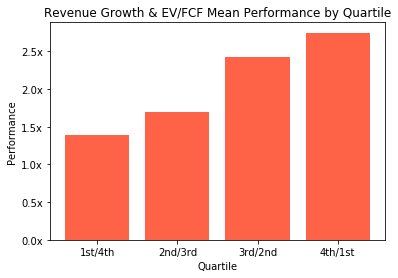

In [323]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x,pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("Revenue Growth & EV/FCF Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st/4th', '2nd/3rd', '3rd/2nd','4th/1st'])
plt.show()

# Growth

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


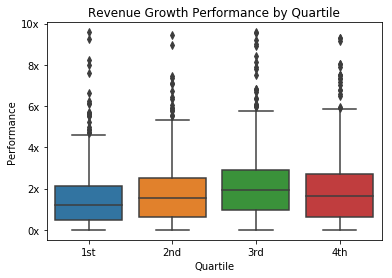

In [324]:
Dict1 = {'25': tablepositive[FILTERrevg].performance, '50' : tablepositive[FILTER2revg].performance, '75' : tablepositive[FILTER3revg].performance, '100' :tablepositive[FILTER4revg].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

filter1 = df['Performance'] < 10

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("Revenue Growth Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])

plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])

plt.show()

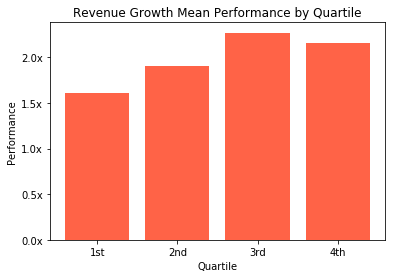

In [325]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("Revenue Growth Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

# EV / Rev

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


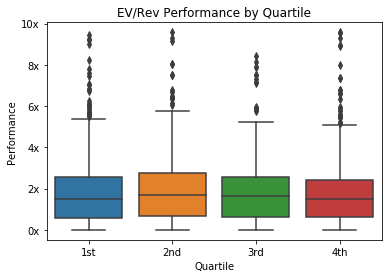

In [326]:
Dict1 = {'25': tablepositive[FILTERevrev].performance, '50' : tablepositive[FILTER2evrev].performance, '75' : tablepositive[FILTER3evrev].performance, '100' :tablepositive[FILTER4evrev].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

filter1 = df['Performance'] < 10

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("EV/Rev Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])

plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])

plt.show()

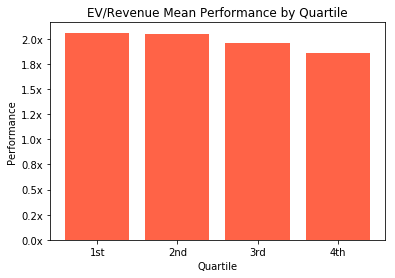

In [327]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("EV/Revenue Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [328]:
#t-test comparing top 25 to bottom 25

import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)


Ttest_indResult(statistic=-1.378236712887561, pvalue=0.16843818825768536)

# ev / fcf

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


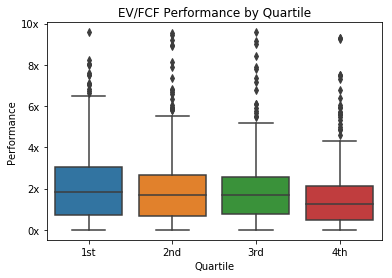

In [329]:
Dict1 = {'25': tablepositive[FILTERevfcf].performance, '50' : tablepositive[FILTER2evfcf].performance, '75' : tablepositive[FILTER3evfcf].performance, '100' :tablepositive[FILTER4evfcf].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

filter1 = df['Performance'] < 10

import seaborn as sns

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("EV/FCF Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [330]:
df[df['Quartile']==25]['Performance'].mean()

2.275491514013809

In [331]:
df[df['Quartile']==100]['Performance'].mean()

1.6627283101325983

In [332]:
df[df['Quartile']==25]['Performance'].median()

1.8553467176929408

In [333]:
df[df['Quartile']==100]['Performance'].median()

1.251472320376914

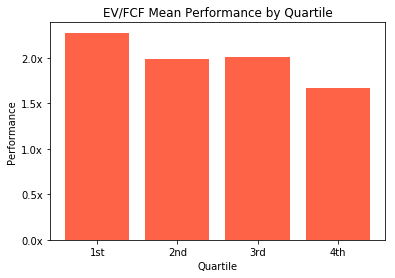

In [334]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("EV/FCF Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [335]:
import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)

Ttest_indResult(statistic=-4.2522117133442654, pvalue=2.3147862603444186e-05)

# pb

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


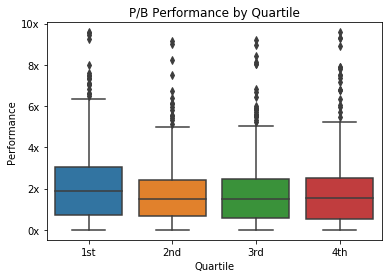

In [336]:
Dict1 = {'25': tablepositive[FILTERpb].performance, '50' : tablepositive[FILTER2pb].performance, '75' : tablepositive[FILTER3pb].performance, '100' :tablepositive[FILTER4pb].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

filter1 = df['Performance'] < 10

import seaborn as sns

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("P/B Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

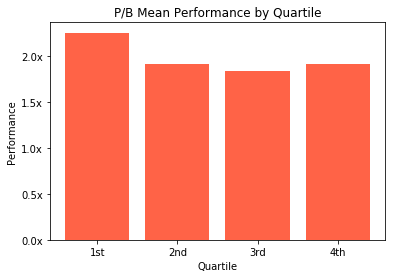

In [337]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("P/B Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [338]:
import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)

Ttest_indResult(statistic=-2.4812433434841124, pvalue=0.013255618050857808)

# pe1

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


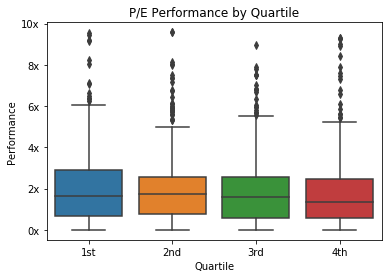

In [339]:
Dict1 = {'25': tablepositive[FILTERpe1].performance, '50' : tablepositive[FILTER2pe1].performance, '75' : tablepositive[FILTER3pe1].performance, '100' :tablepositive[FILTER4pe1].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 

filter1 = df['Performance'] < 10

import seaborn as sns

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("P/E Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

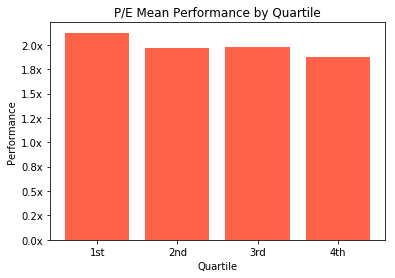

In [340]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("P/E Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [341]:
import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)

Ttest_indResult(statistic=-1.8192514277331089, pvalue=0.069171720447741322)

# ps1

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


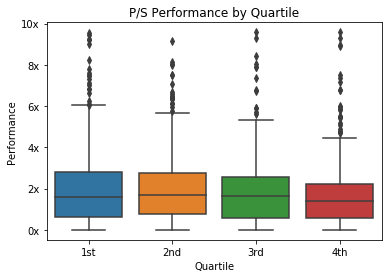

In [342]:
Dict1 = {'25': tablepositive[FILTERps1].performance, '50' : tablepositive[FILTER2ps1].performance, '75' : tablepositive[FILTER3ps1].performance, '100' :tablepositive[FILTER4ps1].performance}
df = pd.DataFrame(Dict1)
df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df['Quartile'] = df['Quartile'].astype('int') 
df=df.drop(['a'], axis=1)
order = sorted(df.Quartile.unique())

filter1 = df['Performance'] < 10


import seaborn as sns

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("P/S Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance",order=order,data=df[filter1])
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

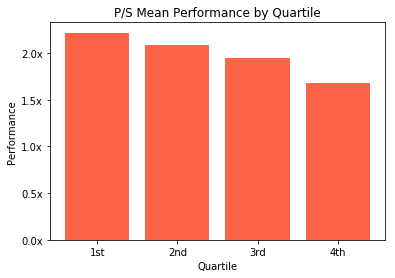

In [343]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("P/S Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

In [344]:
import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)

Ttest_indResult(statistic=-3.7208694112624756, pvalue=0.00020957362609059566)

# ev / ebitda

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


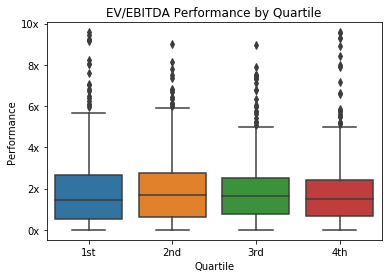

In [345]:
Dict1 = {'25': tablepositive[FILTERevebitda].performance, '50' : tablepositive[FILTER2evebitda].performance, '75' : tablepositive[FILTER3evebitda].performance, '100' :tablepositive[FILTER4evebitda].performance}
df = pd.DataFrame(Dict1)

df = df.stack()

df= pd.DataFrame(df)
df.reset_index(inplace=True)
df.columns = ['a','Quartile','Performance']
df=df.drop(['a'], axis=1)
df['Quartile'] = df['Quartile'].astype('int') 


filter1 = df['Performance'] < 10


import seaborn as sns

def millions(x, pos):
    return '%1.fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.title("EV/EBITDA Performance by Quartile")
sns.boxplot(x="Quartile", y="Performance", data=df[filter1])
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])
plt.show()

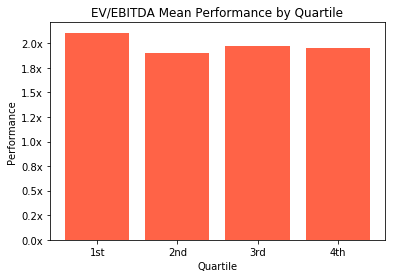

In [346]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [df[df['Quartile']==25]['Performance'].mean(), df[df['Quartile']==50]['Performance'].mean(), df[df['Quartile']==75]['Performance'].mean(), df[df['Quartile']==100]['Performance'].mean()]


def millions(x, pos):
    return '%1.1fx' % (x)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money,color='tomato')
plt.xticks(x, [25,50,75,100])
plt.xlabel("Quartile")
plt.ylabel("Performance")
plt.title("EV/EBITDA Mean Performance by Quartile")
plt.xticks([0, 1, 2,3], ['1st', '2nd', '3rd','4th'])

plt.show()

In [347]:
import scipy.stats as st

pf = df[df['Quartile']==25]['Performance']

pf1 = df[df['Quartile']==100]['Performance']

st.ttest_ind(pf1,pf)

Ttest_indResult(statistic=-0.98437325287290045, pvalue=0.32516988805529656)

# Random Forest Regression

In [348]:
X = tablepositive[['evfcf']]
y = tablepositive['performance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state=1,n_jobs = -1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_train_pred.mean()

1.9726469301847851

In [349]:
X25 = X_test[(X_test['evfcf']<=np.percentile(X_test['evfcf'], 25))]

X100 = X_test[(X_test['evfcf']>=np.percentile(X_test['evfcf'], 75))]

In [350]:
y_train_pred = forest.predict(X25)
y_train_pred.mean()

2.2205077667708966

In [351]:
y_train_pred = forest.predict(X100)
y_train_pred.mean()

1.6179079933347613

In [352]:
X = tablepositive[['evfcf','revgrowth']]
y = tablepositive['performance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state=1,n_jobs = -1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_train_pred.mean()

1.9874959555619089

In [353]:
X25 = X_test[(X_test['evfcf']<=np.percentile(X_test['evfcf'], 25)) & (X_test['revgrowth']>=np.percentile(X_test['revgrowth'], 75))]

X100 = X_test[(X_test['evfcf']>=np.percentile(X_test['evfcf'], 75)) & (X_test['revgrowth']<=np.percentile(X_test['revgrowth'], 25))]

In [354]:
y_train_pred = forest.predict(X25)
y_train_pred.mean()

2.5720337756116143

In [355]:
y_train_pred = forest.predict(X100)
y_train_pred.mean()

1.2725125715803765

# Gradiant Boost Regression

In [356]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error


X = tablepositive[['evfcf']]

Y = tablepositive['performance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

# Fit regression model
params = {'n_estimators': 100, 'max_depth': 1, 'min_samples_split': 2,
          'learning_rate': .1, 'loss': 'ls','criterion':'friedman_mse'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

MSE: 3.3549


In [357]:
X25 = X_test[(X_test['evfcf']<=np.percentile(X_test['evfcf'], 25))]

X100 = X_test[(X_test['evfcf']>=np.percentile(X_test['evfcf'], 75))]

In [358]:
y_train_pred = clf.predict(X25)
y_train_pred.mean()

2.2675637730790426

In [359]:
y_train_pred = clf.predict(X100)
y_train_pred.mean()

1.6747276502087929

In [360]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

X = tablepositive[['evfcf','revgrowth']]

Y = tablepositive['performance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

# Fit regression model
params = {'n_estimators': 100, 'max_depth': 1, 'min_samples_split': 2,
          'learning_rate': .1, 'loss': 'ls','criterion':'friedman_mse'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# compute test set deviance

#crate empty array
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

#fill array with loss per n_estimator
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

MSE: 3.1976


In [361]:
X25 = X_test[(X_test['evfcf']<np.percentile(X_test['evfcf'], 25)) & (X_test['revgrowth']>np.percentile(X_test['revgrowth'], 75))]

X100 = X_test[(X_test['evfcf']>np.percentile(X_test['evfcf'], 75)) & (X_test['revgrowth']<np.percentile(X_test['revgrowth'], 25))]

In [362]:
y_train_pred = clf.predict(X25)
y_train_pred.mean()

2.5243506368775694

In [363]:
y_train_pred = clf.predict(X100)
y_train_pred.mean()

1.3081340809755662